In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
# define functions

def f(T, m, Tc=1.25):
    return 0.5*(1-Tc/T)*m**2 + (Tc/T)**3*m**4/12

In [11]:
Tc=1.25

N_train = [100, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 7500, 10000, 15000, 20000, 30000, 50000]

# Polynomial results
poly_train_maes = []
poly_test_maes = []
poly_train_mses = []
poly_test_mses = []

# Neural Network results
nn_train_maes = []
nn_test_maes = []
nn_train_mses = []
nn_test_mses = []

# Set random seed for reproducibility
np.random.seed(42)

for N in N_train:
    print(f"Running experiments for N = {N}")
    
    # Generate data
    T_train = np.random.uniform(1.5, 2.2, N)
    m_train = np.random.uniform(-1.5, 1.5, N)
    T_test = np.random.uniform(0.8, 1.5, N)
    m_test = np.random.uniform(-1.5, 1.5, N)
    y_train = f(T_train, m_train)
    y_test = f(T_test, m_test)

    X_train = np.column_stack([T_train, m_train])
    X_test = np.column_stack([T_test, m_test])

    # 1. Polynomial Regression (degree 8)
    poly_features = PolynomialFeatures(degree=8, include_bias=True)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    poly_reg = Ridge(alpha=1e-5)
    poly_reg.fit(X_train_poly, y_train)
    y_train_pred_poly = poly_reg.predict(X_train_poly)
    y_test_pred_poly = poly_reg.predict(X_test_poly)
    
    poly_train_maes.append(mean_absolute_error(y_train, y_train_pred_poly))
    poly_test_maes.append(mean_absolute_error(y_test, y_test_pred_poly))
    poly_train_mses.append(mean_squared_error(y_train, y_train_pred_poly))
    poly_test_mses.append(mean_squared_error(y_test, y_test_pred_poly))

    # 2. Neural Network (constant architecture)
    nn = MLPRegressor(hidden_layer_sizes=(64, 64, 64), 
                      max_iter=1000, 
                      solver='lbfgs',
                      random_state=42,
                      alpha=1e-5)
    nn.fit(X_train, y_train)
    y_train_pred_nn = nn.predict(X_train)
    y_test_pred_nn = nn.predict(X_test)
    
    nn_train_maes.append(mean_absolute_error(y_train, y_train_pred_nn))
    nn_test_maes.append(mean_absolute_error(y_test, y_test_pred_nn))
    nn_train_mses.append(mean_squared_error(y_train, y_train_pred_nn))
    nn_test_mses.append(mean_squared_error(y_test, y_test_pred_nn))

    print(f"  Poly - Train MAE: {poly_train_maes[-1]:.2e}, Test MAE: {poly_test_maes[-1]:.2e}")
    print(f"  NN - Train MAE: {nn_train_maes[-1]:.2e}, Test MAE: {nn_test_maes[-1]:.2e}")
    print("-" * 80)

Running experiments for N = 100
  Poly - Train MAE: 6.07e-05, Test MAE: 2.00e-02
  NN - Train MAE: 2.67e-03, Test MAE: 3.41e-02
--------------------------------------------------------------------------------
Running experiments for N = 500
  Poly - Train MAE: 2.79e-05, Test MAE: 1.55e-02
  NN - Train MAE: 2.71e-03, Test MAE: 2.69e-02
--------------------------------------------------------------------------------
Running experiments for N = 1000
  Poly - Train MAE: 2.26e-05, Test MAE: 1.51e-02
  NN - Train MAE: 2.64e-03, Test MAE: 2.71e-02
--------------------------------------------------------------------------------
Running experiments for N = 1500
  Poly - Train MAE: 1.90e-05, Test MAE: 1.75e-02
  NN - Train MAE: 3.17e-03, Test MAE: 2.74e-02
--------------------------------------------------------------------------------
Running experiments for N = 2000
  Poly - Train MAE: 2.06e-05, Test MAE: 1.56e-02
  NN - Train MAE: 3.09e-03, Test MAE: 2.54e-02
---------------------------------

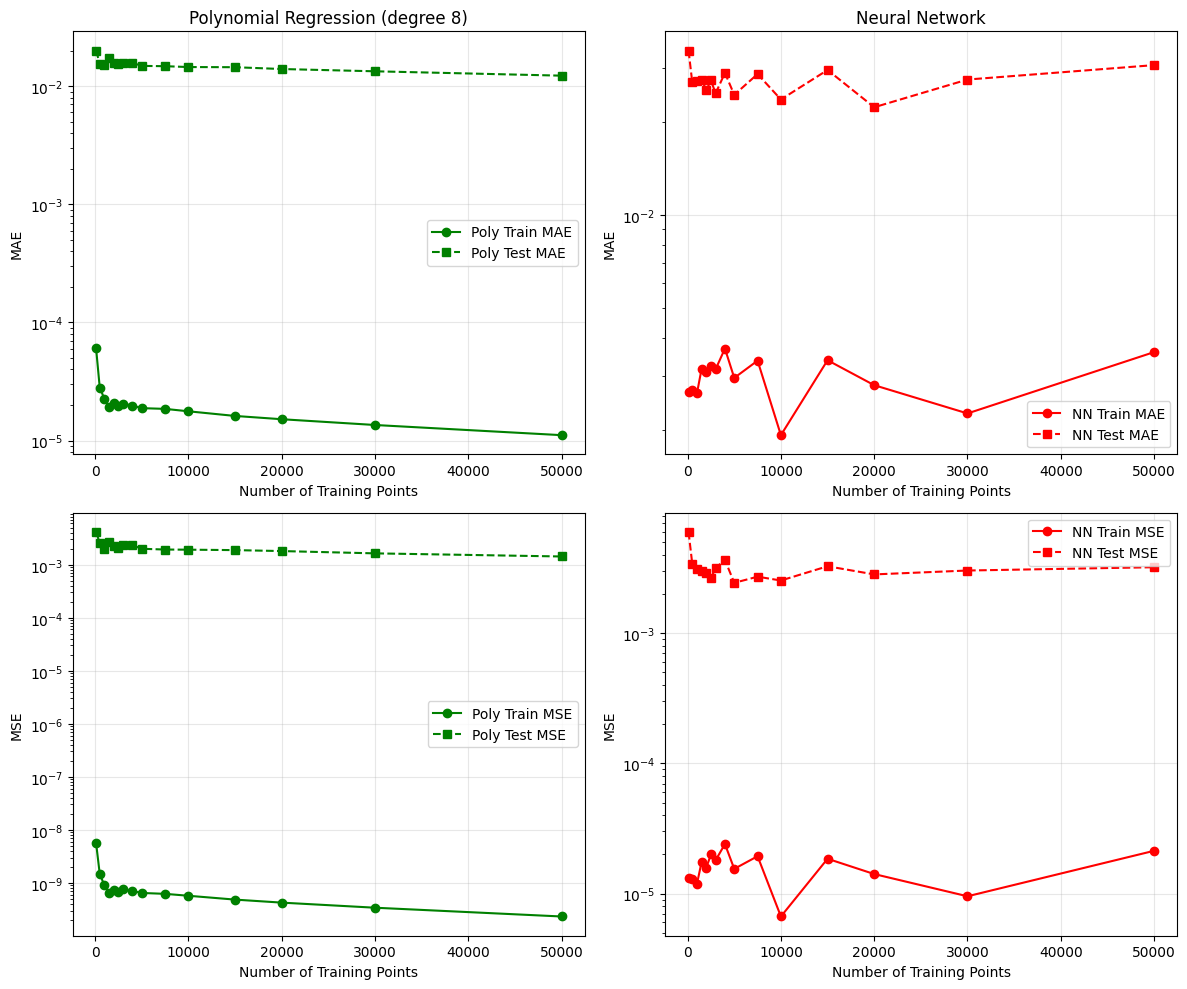

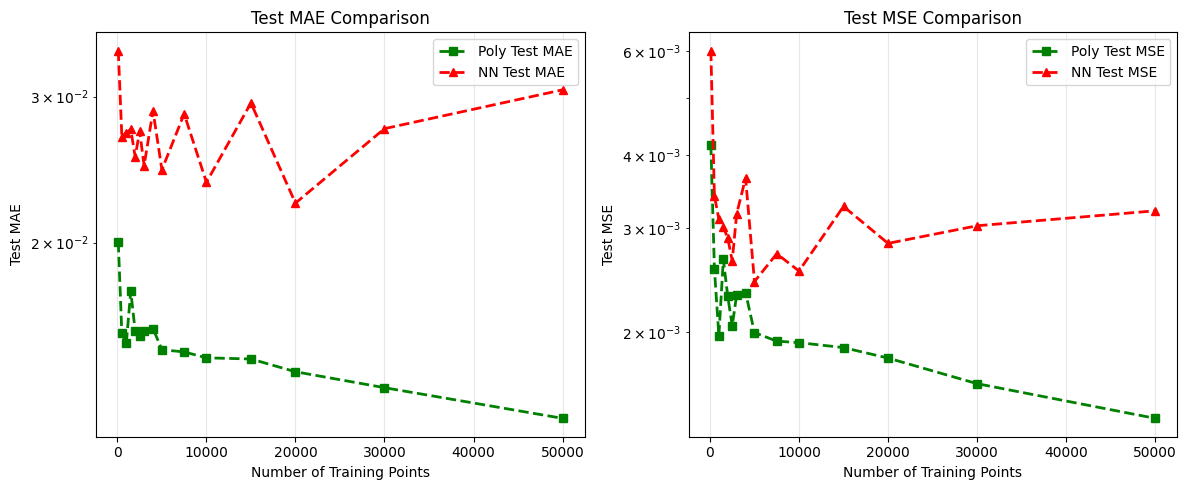

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# MAE plots
axes[0, 0].plot(N_train, poly_train_maes, 'g-', label='Poly Train MAE', marker='o')
axes[0, 0].plot(N_train, poly_test_maes, 'g--', label='Poly Test MAE', marker='s')
axes[0, 0].set_xlabel('Number of Training Points')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_title('Polynomial Regression (degree 8)')
axes[0, 0].legend()
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(N_train, nn_train_maes, 'r-', label='NN Train MAE', marker='o')
axes[0, 1].plot(N_train, nn_test_maes, 'r--', label='NN Test MAE', marker='s')
axes[0, 1].set_xlabel('Number of Training Points')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Neural Network')
axes[0, 1].legend()
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# MSE plots
axes[1, 0].plot(N_train, poly_train_mses, 'g-', label='Poly Train MSE', marker='o')
axes[1, 0].plot(N_train, poly_test_mses, 'g--', label='Poly Test MSE', marker='s')
axes[1, 0].set_xlabel('Number of Training Points')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].legend()
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(N_train, nn_train_mses, 'r-', label='NN Train MSE', marker='o')
axes[1, 1].plot(N_train, nn_test_mses, 'r--', label='NN Test MSE', marker='s')
axes[1, 1].set_xlabel('Number of Training Points')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].legend()
axes[1, 1].set_yscale('log')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figs/poly_nn_data_efficiency.png', dpi=300, bbox_inches='tight')
plt.show()

# Comparison plot - polynomial vs neural network
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Combined MAE plot
axes[0].plot(N_train, poly_test_maes, 'g--', label='Poly Test MAE', marker='s', linewidth=2)
axes[0].plot(N_train, nn_test_maes, 'r--', label='NN Test MAE', marker='^', linewidth=2)
axes[0].set_xlabel('Number of Training Points')
axes[0].set_ylabel('Test MAE')
axes[0].set_title('Test MAE Comparison')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# Combined MSE plot
axes[1].plot(N_train, poly_test_mses, 'g--', label='Poly Test MSE', marker='s', linewidth=2)
axes[1].plot(N_train, nn_test_mses, 'r--', label='NN Test MSE', marker='^', linewidth=2)
axes[1].set_xlabel('Number of Training Points')
axes[1].set_ylabel('Test MSE')
axes[1].set_title('Test MSE Comparison')
axes[1].legend()
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figs/poly_nn_comparison.png', dpi=300, bbox_inches='tight')
plt.show()